In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#setting random seed 
np.random.seed(42)

data = pd.read_csv("paddyclean.csv")
X = data.drop("Paddy yield(in Kg)", axis=1)
y = data["Paddy yield(in Kg)"]

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns


preprocess = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


n this initial chunk I set a global seed for the entire notebook. Then I import the data and split it into X and y. Due to prior issues with variable types i separated columns by numeric and categorical and then preprocessed them by using a standard scaler on the numeric columns and one hot encoding the categorical columns. 

# **Ridge Regression**

RIDGE CV: 0.7778865628864732


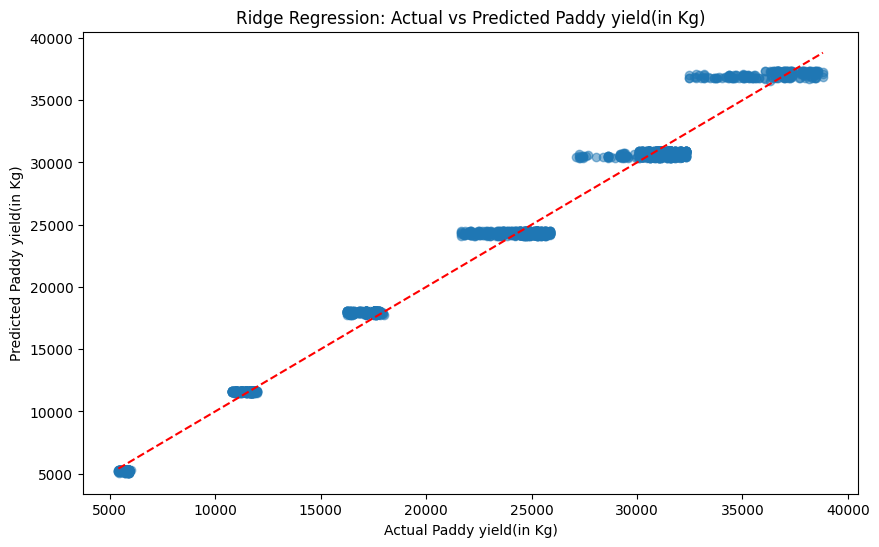

In [2]:
ridge_pipe = Pipeline([
    ("preprocess", preprocess),
    ("ridge", Ridge())
])

ridge_params = {'ridge__alpha':[0.1,1,10,100]}

ridge_search = GridSearchCV(ridge_pipe, ridge_params, cv=5)
ridge_search.fit(X,y)

best_ridge = ridge_search.best_estimator_

print("RIDGE CV:", ridge_search.best_score_)

plt.figure(figsize=(10,6))
plt.scatter(y, best_ridge.predict(X), alpha=0.5)
plt.xlabel('Actual Paddy yield(in Kg)')
plt.ylabel('Predicted Paddy yield(in Kg)')
plt.title('Ridge Regression: Actual vs Predicted Paddy yield(in Kg)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


Within the pipeline I have preprocessing and ridge regression as requested. Following that I perform gridsearch to find the best parameters and fit that with the original data. Then I plot the line using the best parameters.

# **Support Vector Regression**

SVR CV: 0.7679239516237079


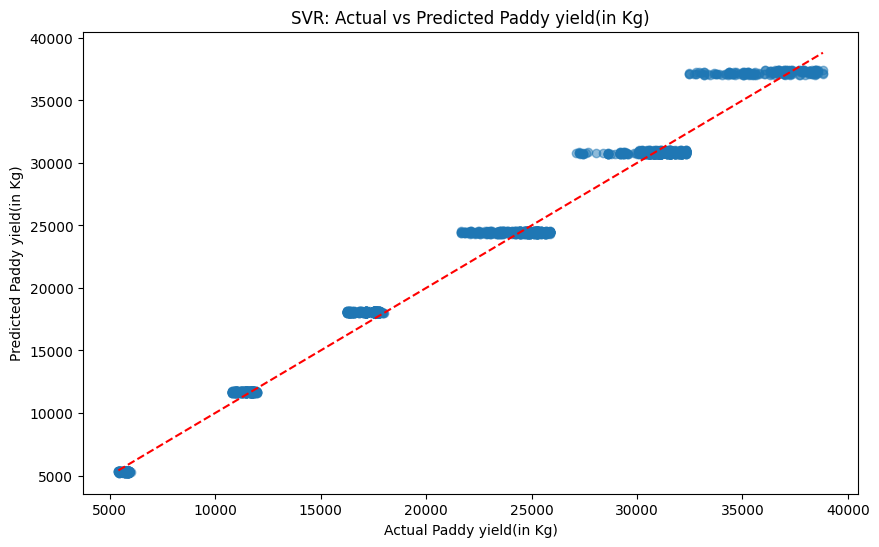

In [3]:
svr_pipe = Pipeline([
    ("preprocess", preprocess),
    ("svr", SVR())
])

svr_params = {
    "svr__C":[0.1,1,10,100],
    "svr__epsilon":[0.01,0.1,1],
    "svr__kernel":["rbf","poly","linear"],
    "svr__degree":[2,3,4],
    "svr__gamma":["scale","auto"]
}

svr_search = GridSearchCV(svr_pipe, svr_params, cv=5, n_jobs=-1)
svr_search.fit(X,y)

best_svr = svr_search.best_estimator_

print("SVR CV:", svr_search.best_score_)

plt.figure(figsize=(10,6))
plt.scatter(y, best_svr.predict(X), alpha=0.5)
plt.xlabel('Actual Paddy yield(in Kg)')
plt.ylabel('Predicted Paddy yield(in Kg)')
plt.title('SVR: Actual vs Predicted Paddy yield(in Kg)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


Similarly to the prior method here I fit a pipeline using preprocessing and support vector regression. Grid search was performed and fit within the pipeline. Additionally the best parameters were selected and plotted along with the regression line.

## **Accuracy**

In [4]:
testX = pd.read_csv("data/X_test.csv")
testy = pd.read_csv("data/y_test.csv")

testX.columns = testX.columns.str.strip()


ridge_pred = best_ridge.predict(testX)
svr_pred = best_svr.predict(testX)

print("RIDGE Test R2:", r2_score(testy, ridge_pred))
print("SVR Test R2:", r2_score(testy, svr_pred))
print("RIDGE Test MSE:", mean_squared_error(testy, ridge_pred))
print("SVR Test MSE:", mean_squared_error(testy, svr_pred))
print("RIDGE Test MAE:", mean_absolute_error(testy, ridge_pred))
print("SVR Test MAE:", mean_absolute_error(testy, svr_pred))


RIDGE Test R2: 0.9894022034045702
SVR Test R2: 0.9888370294474184
RIDGE Test MSE: 859586.7111843703
SVR Test MSE: 905427.9404154258
RIDGE Test MAE: 698.1546390158354
SVR Test MAE: 698.5715727808996


Here the test data is collected and stripped of white space due to a conflict with the original dataset. After grabbing the prediction variables and fitting them to the test data R^2, MSE, and MAE are all collected for both Ridge regression and Support Vector Regression